In [1]:
pwd

'C:\\Users\\aaron\\documents\\py36\\software\\scattersim-examples'

In [5]:

from ScatterSim.MultiComponentModel import *
from ScatterSim.NanoObjects import SphereNanoObject
from ScatterSim.BaseClasses import *
#from ScatterSim.Interaction import * 
import matplotlib.pyplot as plt
from numpy import *
%matplotlib notebook
import pickle

In [6]:
# Settings
########################################
ptype = 'structure_factor'
area_of_interest = [0.0,0.4,0,2.0]

plot_data = True

#lattice_name = 'SC'
#lattice_name = 'BCC'
lattice_name = 'FCC'



# Load experimental data
########################################

data_dir = './data_ye/'
data_file = 'simple cubic.txt'
#ff_data_file = 'SC_0.15M_t71.ave'

d = ExperimentalData1D()
d.load_intensity_txt( data_dir+data_file, skiprows=1, subtract_minimum=True )
#d.load_form_factor_txt( data_dir+ff_data_file, skiprows=1, subtract_minimum=True )
d.set_structure_factor_asymptote( 0.42, 0.65 )
 
    
    
    #def load_form_factor_fit(self, q_list, int_list):
     #   self.have_fit_ff = True
        #  self.q_ff_fit = q_list
        # self.ff_fit = int_list

In [7]:
#dummy ff values
q = d.q_vals
q = np.linspace(0.0322, 1.56, 656)
pargs_cube = {'radius' : 15.0}
cube = SphereNanoObject(pargs_cube)

sq_cube= cube.form_factor_squared_isotropic(q)

<IPython.core.display.Javascript object>


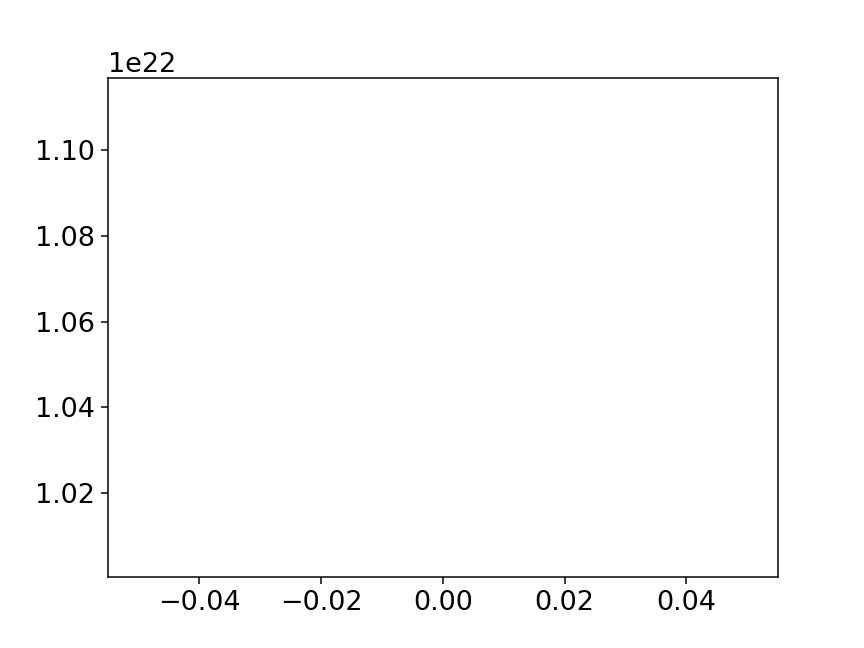

In [8]:
if plot_data:
    d.plot_intensity( scaling=[0.0,0.75,1e2,5e3], ylog=True )
    #d.plot_form_factor( scaling=[0.0,0.7,0.5,2e4], ylog=True )
    #d.plot_structure_factor( scaling=[0.0,0.7,0,2.0] )
    
    # Save data
    #if ptype=='structure_factor':
        #s_of_q = d.structure_factor()
        # filename = 'fit_dat-data-'+data_file+'.pkl'
        #fout = open( filename, 'w' )
        #pickle.dump( s_of_q , fout )
        #fout.close()

In [9]:
# Candidate model
########################################



# Densities
sld_water = 9.43 # 10^-6 A^-2
sld_Au = 119.16 # 10^-6 A^-2

# Particles
pargs={ 'radius': 26.0/2.0, 'sigma_R': 0.1, 'rho_ambient': sld_water, 'rho1': sld_Au, 'iso_external': True }
pargs={ 'radius': 30.0/2.0, 'sigma_R': 0.1, 'rho_ambient': sld_water, 'rho1': sld_Au, 'iso_external': True }
#Au = CubeNanoObject( pargs={ 'radius': 26.0/2.0, 'rho_ambient': sld_water, 'rho1': sld_Au } )
Au = CubePolydisperseNanoObject( pargs=pargs )


# Non-lattice parameters
peak1 = PeakShape(nu=1, delta=0.05)
back = background( 5.0, 0.012, -4.0, 5.0, -0.5 )

nearest_neighbor = 55.6


# Lattice
if lattice_name=='SC':
    # Simple Cubic (SC)
    lattice_spacing = nearest_neighbor*1.0
    
    l = SimpleCubic( [Au], lattice_spacing, sigma_D=0.1 )
    #l = AlternatingSimpleCubic( [Au], lattice_spacing, sigma_D=0.1 )
    
    back_c = 0.0
    initial_guess = [600e-5, 0, 0.03, 0.2, back_c*0.0, back_c*0.0, -6.0, back_c*0.30, -2.00, 0.8, 0.0 ]

if lattice_name=='BCC':
    # BCC
    nearest_neighbor = 67.0
    lattice_spacing = nearest_neighbor/( sqrt(3.0)/(2.0) )
    
    l = BCCLattice( [Au], lattice_spacing, sigma_D=0.1 )
    #l = AlternatingSimpleCubic( [Au], lattice_spacing, sigma_D=0.1 )
    
    back_c = 0.0
    initial_guess = [30e-5, 0, 0.03, 0.12, back_c*0.0, back_c*0.0, -6.0, back_c*0.30, -2.00, 0.8, 0.0 ]

if lattice_name=='FCC':
    # FCC
    nearest_neighbor = 69.0
    lattice_spacing = nearest_neighbor/( sqrt(2.0)/(2.0) )
    
    l = FCCLattice( [Au], lattice_spacing, sigma_D=0.1 )
    #l = FaceCenteredFourParticleLattice( [Au, Au, Au, Au], lattice_spacing, sigma_D=0.1 )
    
    back_c = 0
    initial_guess = [4.5e-5, 0, 0.03, 0.1, back_c*0.0, back_c*0.0, -6.0, back_c*0.30, -2.00, 0.8, 0.0 ]




    
print( l.to_string() )

Lattice of type: FCCLattice
    Family: cubic   System: cubic   Bravais: F   Class: hexoctahedral   Space Group: Fm3m
    (a, b, c) = (97.581,97.581,97.581) in nm
    (alpha, beta, gamma) = (1.571,1.571,1.571) in radians
                         = (90.00,90.00,90.00) in degrees
    volume = 929163.7663 nm^3

    Objects:
        0 (all)	 CubePolydisperseNanoObject ((0))
    Unit cell:
        0 (corner)
           	CubePolydisperseNanoObject ((0))
           	  at pos = (0.000,0.000,0.000)
        1 (faceXY)
           	CubePolydisperseNanoObject ((0))
           	  at pos = (0.500,0.500,0.000)
        2 (faceYZ)
           	CubePolydisperseNanoObject ((0))
           	  at pos = (0.000,0.500,0.500)
        3 (faceXZ)
           	CubePolydisperseNanoObject ((0))
           	  at pos = (0.500,0.000,0.500)



In [10]:
# Fitting from scipy


#https://github.com/perrygeo/simanneal 1 option
#basin hopping technique

In [ ]:
from scipy.optimize import basinhopping
func = lambda x : np.cos(14.5 * x - 0.3) + (x + 0.2) * x
x0=[1.]

minimizer_kwargs = {"method": "BFGS"}
ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs,
                   niter=100)
print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

<IPython.core.display.Javascript object>


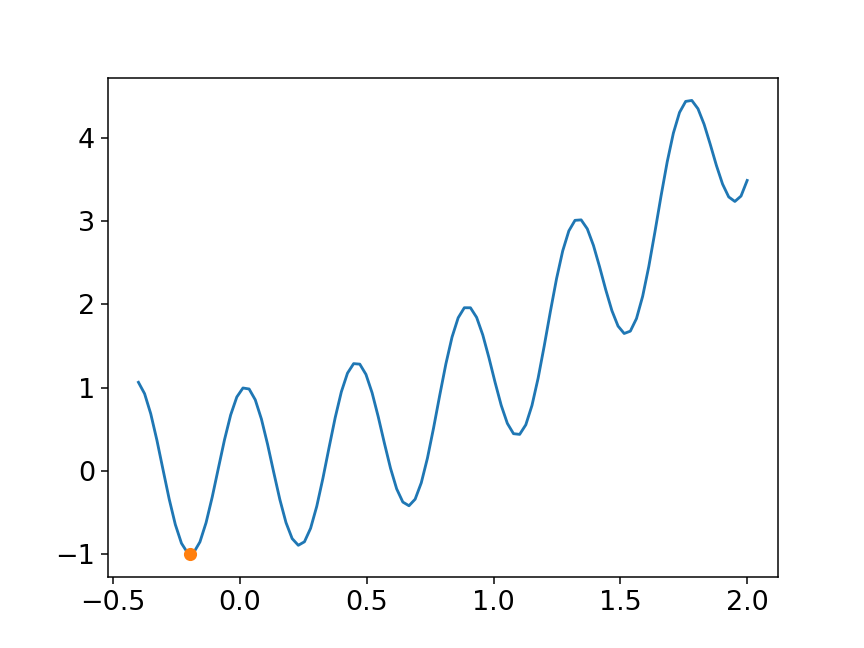

In [45]:
xp = np.linspace(-0.4,2,100)
yp = func(xp)

plt.figure(0);
plt.clf()
plt.plot(xp,yp)
plt.plot(ret.x,ret.fun,'o')

In [17]:
def func2d(x):
    f = np.cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] +
                                                           0.2) * x[0]
    df = np.zeros(2)
    df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
    df[1] = 2. * x[1] + 0.2
    return f, df

minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}
x0 = [1.0, 1.0]
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs,
                   niter=200)
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (ret.x[0],
                                                          ret.x[1],
                                                          ret.fun))



global minimum: x = [-0.1951, -0.1000], f(x0) = -1.0109


In [125]:
x = np.linspace(0,5,100)
y = np.exp(x)+10*np.sin(np.random.normal(0,5,len(x)))


<IPython.core.display.Javascript object>


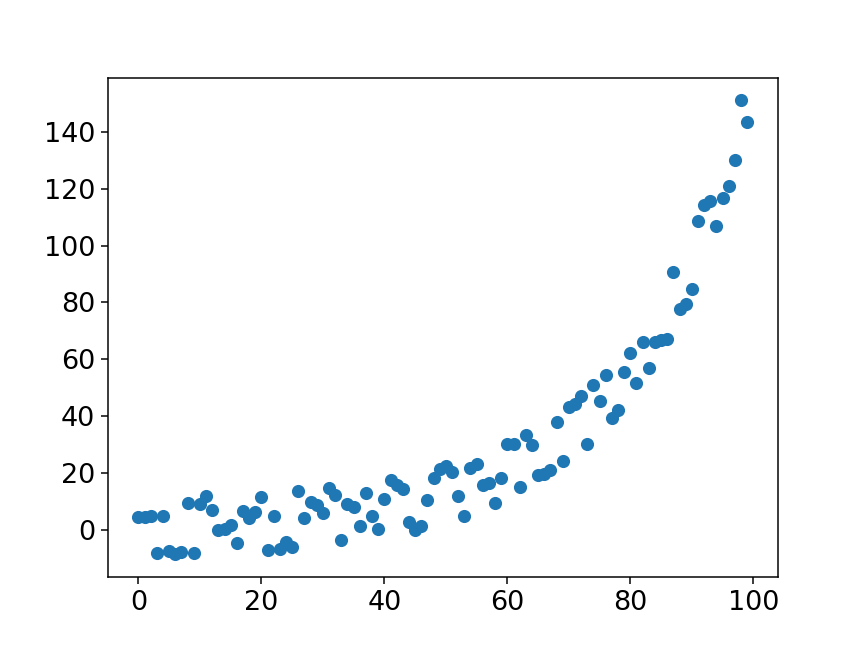

In [129]:
plt.figure();
plt.clf()
plt.plot(y, 'o')

In [136]:
def model_exp(param):
    f = param[0]*np.exp(param[1])+param[2]
    
    return f


class leftovers(object):
    def __init__(self, xmax=[1.1,1.1], xmin=[-1.1,-1.1] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin


def fit_model(f, init):
    minimizer_kwargs = {"method":"L-BFGS-B"}
    init = init
    ret = basinhopping(f, init, minimizer_kwargs=minimizer_kwargs, niter=10)  
    return ret




TypeError: bad operand type for unary -: '_Helper'

In [137]:
init = [1,1,1]
fit_model(model_exp,init)

C:\Users\aaron\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\aaron\Anaconda2\envs\py36\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\aaron\Anaconda2\envs\py36\lib\site-packages\scipy\optimize\_basinhopping.py:284: RuntimeWarning: invalid value encountered in double_scalars
  w = min(1.0, np.exp(-(energy_new - energy_old) * self.beta))


                        fun: -inf
 lowest_optimization_result:       fun: -inf
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.95443013, -4.54592026,  0.99999991])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 176
      nit: 3
   status: 2
  success: False
        x: array([-4.76296766, -0.04664077, -3.15686259])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 11
                       nfev: 1016
                        nit: 10
                          x: array([-4.76296766, -0.04664077, -3.15686259])

In [25]:
# Fit
########################################
margs = {}
margs['ptype'] = ptype
margs['diffuse'] = True
margs['beta_approx'] = False

fargs = {}
fargs['ptype'] = ptype
fargs['mu_T'] = 1.1

# parameters are:  [c, nu, delta, sigma_D, bc, bp, balpha, bp2, balpha2, scale, offset ]
step_sizes = [0.1e-5, 0.05, 0.01, 0.01, 0.1, 0.05, 0.1, 0.05, 0.1, 0.1, 0.1]
vary = [ True, True, True, True, False, False, False, False, False, True, True ] # Hold background
#vary = [ True, False, False, True, False, False, False, False, False, True, False ] # Vary c and sigma_D, and scale
#vary = [ False, False, False, False, False, False, False, False, False, True, True ] # Vary overall



m = MultiComponentModel( l, peak1, back, c=2.1e-12 , margs=margs )
#m.set_experimental_P_of_q( d.q_ff_vals, d.ff_vals ) # Introduces factor of: ~2e-12*

f = MultiComponentFit( d, m, initial_guess=initial_guess,  q_start=0.06, q_end=0.35, vary=vary, step_sizes=step_sizes, fargs=fargs )

AttributeError: 'ExperimentalData1D' object has no attribute 'q_ff_vals'

In [ ]:
# Working
########################################
def single():
    filename = 'fit-working.png'
    f.plot( filename=filename, scaling=area_of_interest, ylog=False, show_extended=False )
    
def watcher():
    filename = 'fit-working.png'
    f.make_watch_file()
    return f.watch_file(plot_filename=filename, scaling=area_of_interest, ylog=False, show_extended=False )

def auto_fit():
    f.plot( filename='fit-before.png', scaling=area_of_interest )
    f.fit( initial_guess )
    f.plot( filename='fit-after.png', scaling=area_of_interest )

def save_fit():
    filename = 'fit-' + l.__class__.__name__ + '.png'
    f.plot( filename=filename, scaling=area_of_interest, ylog=False, show_extended=False )
    
    filename = 'fit_dat-' + l.__class__.__name__ + '.pkl'
    fout = open( filename, 'w' )
    pickle.dump( f.fit_curve(q_start=0.06, q_end=0.35) , fout )
    fout.close()



single()
#initial_guess = watcher()
#auto_fit()
save_fit()
overlay_ops(data_file, scaling=area_of_interest[:-1]+[6], plot=True, output_txt=True)